In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from helpers import utils, noise_models

In [3]:
reload(utils)

<module 'helpers.utils' from '/Users/antrikshdhand/Documents/github/thesis-ml/ml/main/helpers/utils.py'>

In [4]:
TEST_IMAGE_DIR = "../../raw_datasets/BSDS300/images/test"
TEST_IMAGE_1_PATH = TEST_IMAGE_DIR + "/108005.jpg"
TEST_IMAGE_1_COORDS = (160, 50)
TEST_IMAGE_2_PATH = TEST_IMAGE_DIR + "/148089.jpg"
TEST_IMAGE_2_COORDS = (240, 110)
TEST_IMAGE_3_PATH = TEST_IMAGE_DIR + "/302008.jpg"
TEST_IMAGE_3_COORDS = (80, 130)
TEST_IMAGE_4_PATH = TEST_IMAGE_DIR + "/210088.jpg"
TEST_IMAGE_4_COORDS = (80, 130)

STDDEV = 30

## Comparing two models on one image

### Load both models

In [5]:
irfan = keras.models.load_model(
    "models/saved/n2n_imagenet10k_05122024/irfan/50epochs.keras", 
    custom_objects={'psnr': utils.psnr},
    compile=False
)

unet = keras.models.load_model(
    "models/saved/n2n_imagenet10k_05122024/unet/50epochs.keras", 
    custom_objects={'psnr': utils.psnr},
    compile=False
)

2024-12-13 13:01:50.014349: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-13 13:01:50.014375: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-13 13:01:50.014380: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-13 13:01:50.014470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 13:01:50.014768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
def compare_two_models_denoising(
        image_path, model1, model2, patch_coords=None,
        patch_size=192, zero_one_normalisation=True,
        greyscale=True, stddev=None, titles=None):

    # Get ground truth patch
    original_image, ground_truth_patch, top_left_coords = utils._image_to_ground_truth_patch(
        image_path, patch_coords, patch_size, zero_one_normalisation, greyscale
    )
    
    # Get noisy patch
    noisy_patch = noise_models.gaussian_noise(ground_truth_patch, stddev=stddev) 

    # Get denoised patches for each model
    denoised_patch_1 = utils._get_denoised_patch(noisy_patch, model1)
    denoised_patch_2 = utils._get_denoised_patch(noisy_patch, model2)
    denoised_patches = [denoised_patch_1, denoised_patch_2]

    # Plot the original image with the patch rectangle
    ground_truth_fig = utils._plot_ground_truth_with_patch(
        original_image, top_left_coords=top_left_coords, patch_size=patch_size
    )

    patches_fig = utils._plot_patches(ground_truth_patch, noisy_patch, denoised_patches, titles) 

    return ground_truth_fig, patches_fig

1/1 [==============================] - 0s 314ms/step


2024-12-13 13:01:52.864527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-13 13:01:53.131632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 259ms/step


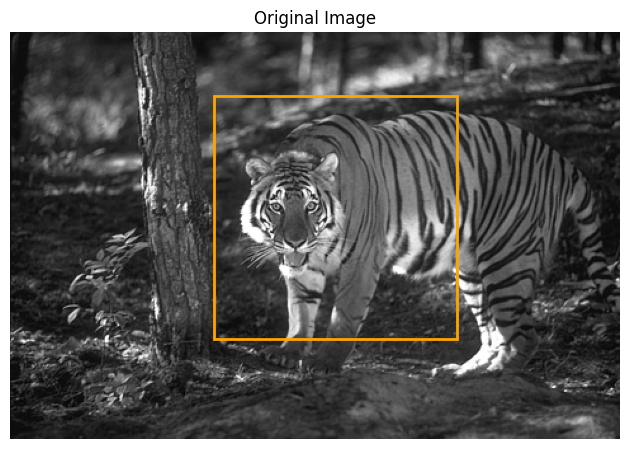

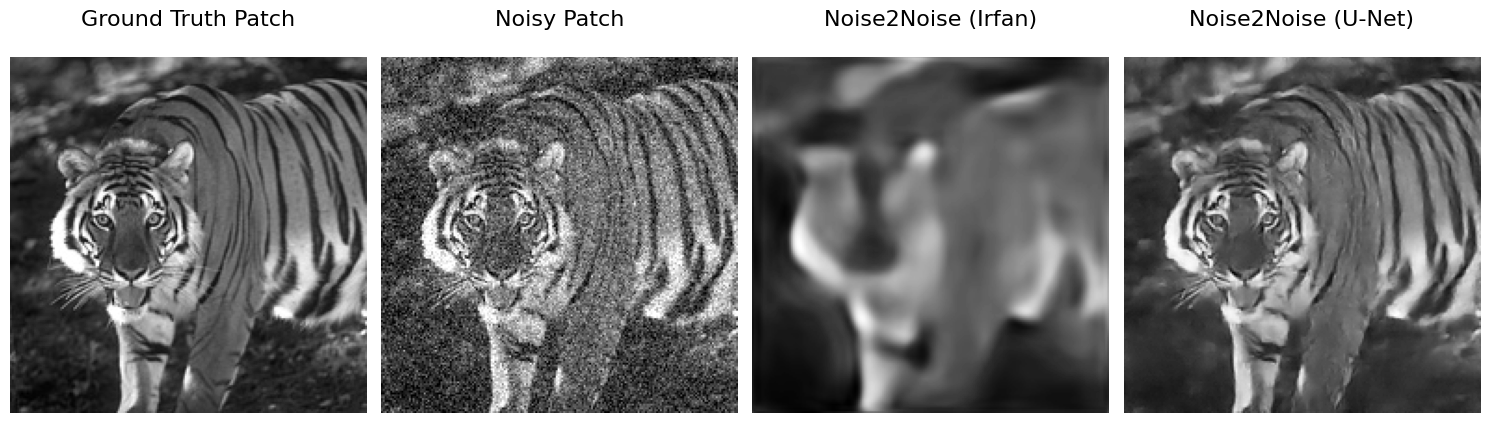

In [7]:
titles = ["Noise2Noise (Irfan)", "Noise2Noise (U-Net)"]
ground_truth_fig, patches_fig = compare_two_models_denoising(image_path=TEST_IMAGE_1_PATH,
                                   model1=irfan, model2=unet, patch_coords=TEST_IMAGE_1_COORDS,
                                   patch_size=192, zero_one_normalisation=True,
                                   greyscale=True, stddev=STDDEV, titles=titles)

ground_truth_fig.savefig("models/saved/n2n_imagenet10k_05122024/img/ground_truth_1.pdf")
patches_fig.savefig("models/saved/n2n_imagenet10k_05122024/img/irfan_vs_unet_1.pdf")

1/1 [==============================] - 0s 55ms/step


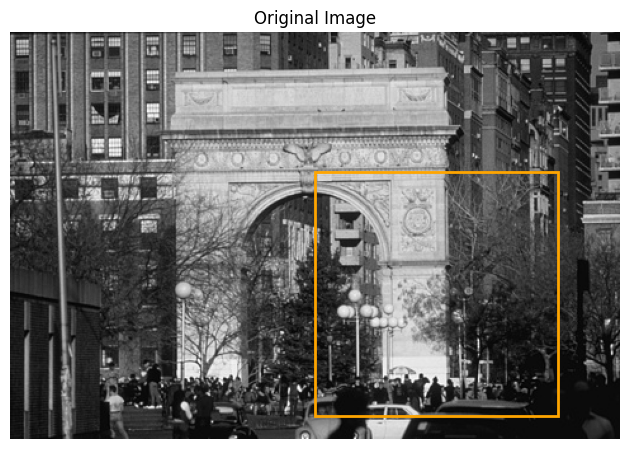

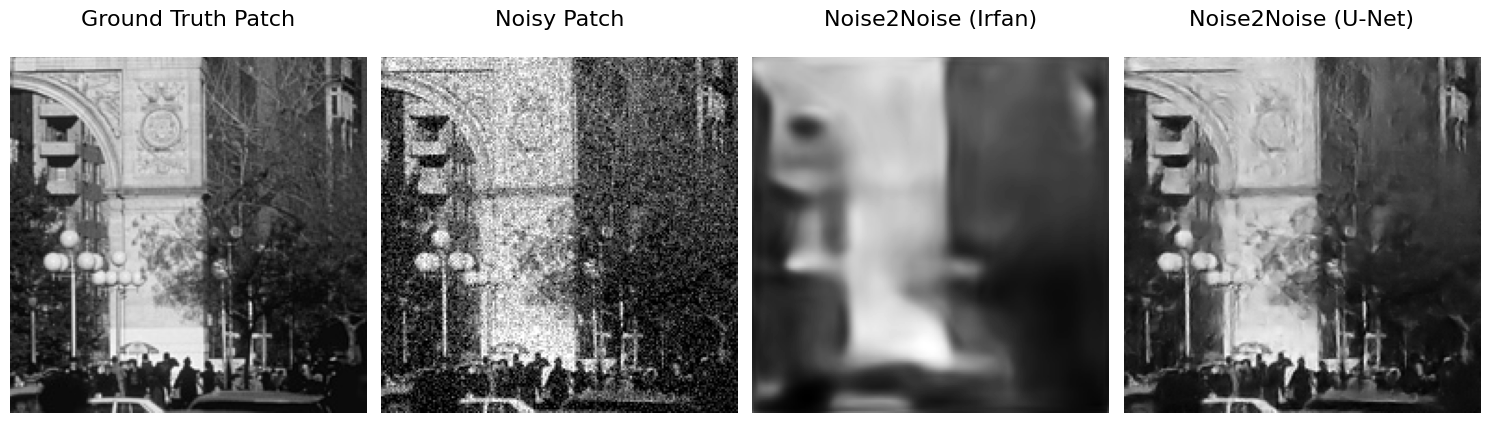

In [8]:
ground_truth_fig, patches_fig = compare_two_models_denoising(image_path=TEST_IMAGE_2_PATH,
                                   model1=irfan, model2=unet, patch_coords=TEST_IMAGE_2_COORDS,
                                   patch_size=192, zero_one_normalisation=True,
                                   greyscale=True, stddev=STDDEV, titles=titles)

ground_truth_fig.savefig("models/saved/n2n_imagenet10k_05122024/img/ground_truth_2.pdf")
patches_fig.savefig("models/saved/n2n_imagenet10k_05122024/img/irfan_vs_unet_2.pdf")

## Comparing multiple models on one image

### Load 2 N2N models and 2 supervised models

In [9]:
n2n_irfan = keras.models.load_model(
    "models/saved/n2n_imagenet10k_05122024/irfan/50epochs.keras", 
    custom_objects={'psnr': utils.psnr},
    compile=False
)

n2n_unet = keras.models.load_model(
    "models/saved/n2n_imagenet10k_05122024/unet/50epochs.keras", 
    custom_objects={'psnr': utils.psnr},
    compile=False
)

sup_irfan = keras.models.load_model(
    "models/saved/supervised_denoiser_07122024/irfan/50epochs.keras",
    custom_objects={'psnr': utils.psnr},
    compile=False
)

sup_unet = keras.models.load_model(
    "models/saved/supervised_denoiser_07122024/unet/50epochs.keras",
    custom_objects={'psnr': utils.psnr},
    compile=False
)

1/1 [==============================] - 0s 172ms/step


2024-12-13 13:01:59.390635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-13 13:01:59.573562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 161ms/step


2024-12-13 13:01:59.836553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-13 13:02:00.009907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 229ms/step


(<Figure size 640x480 with 1 Axes>, <Figure size 1000x2500 with 12 Axes>)

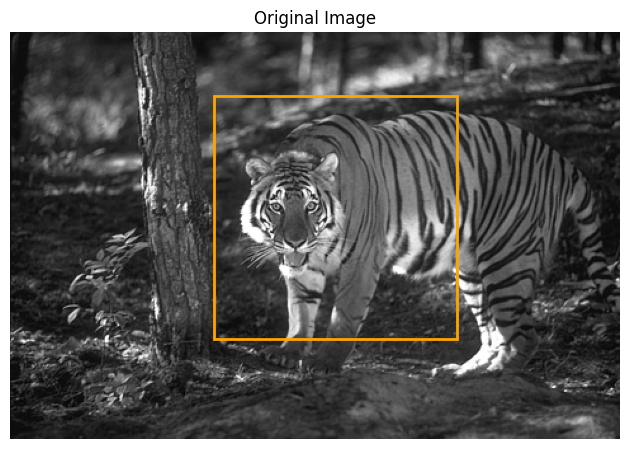

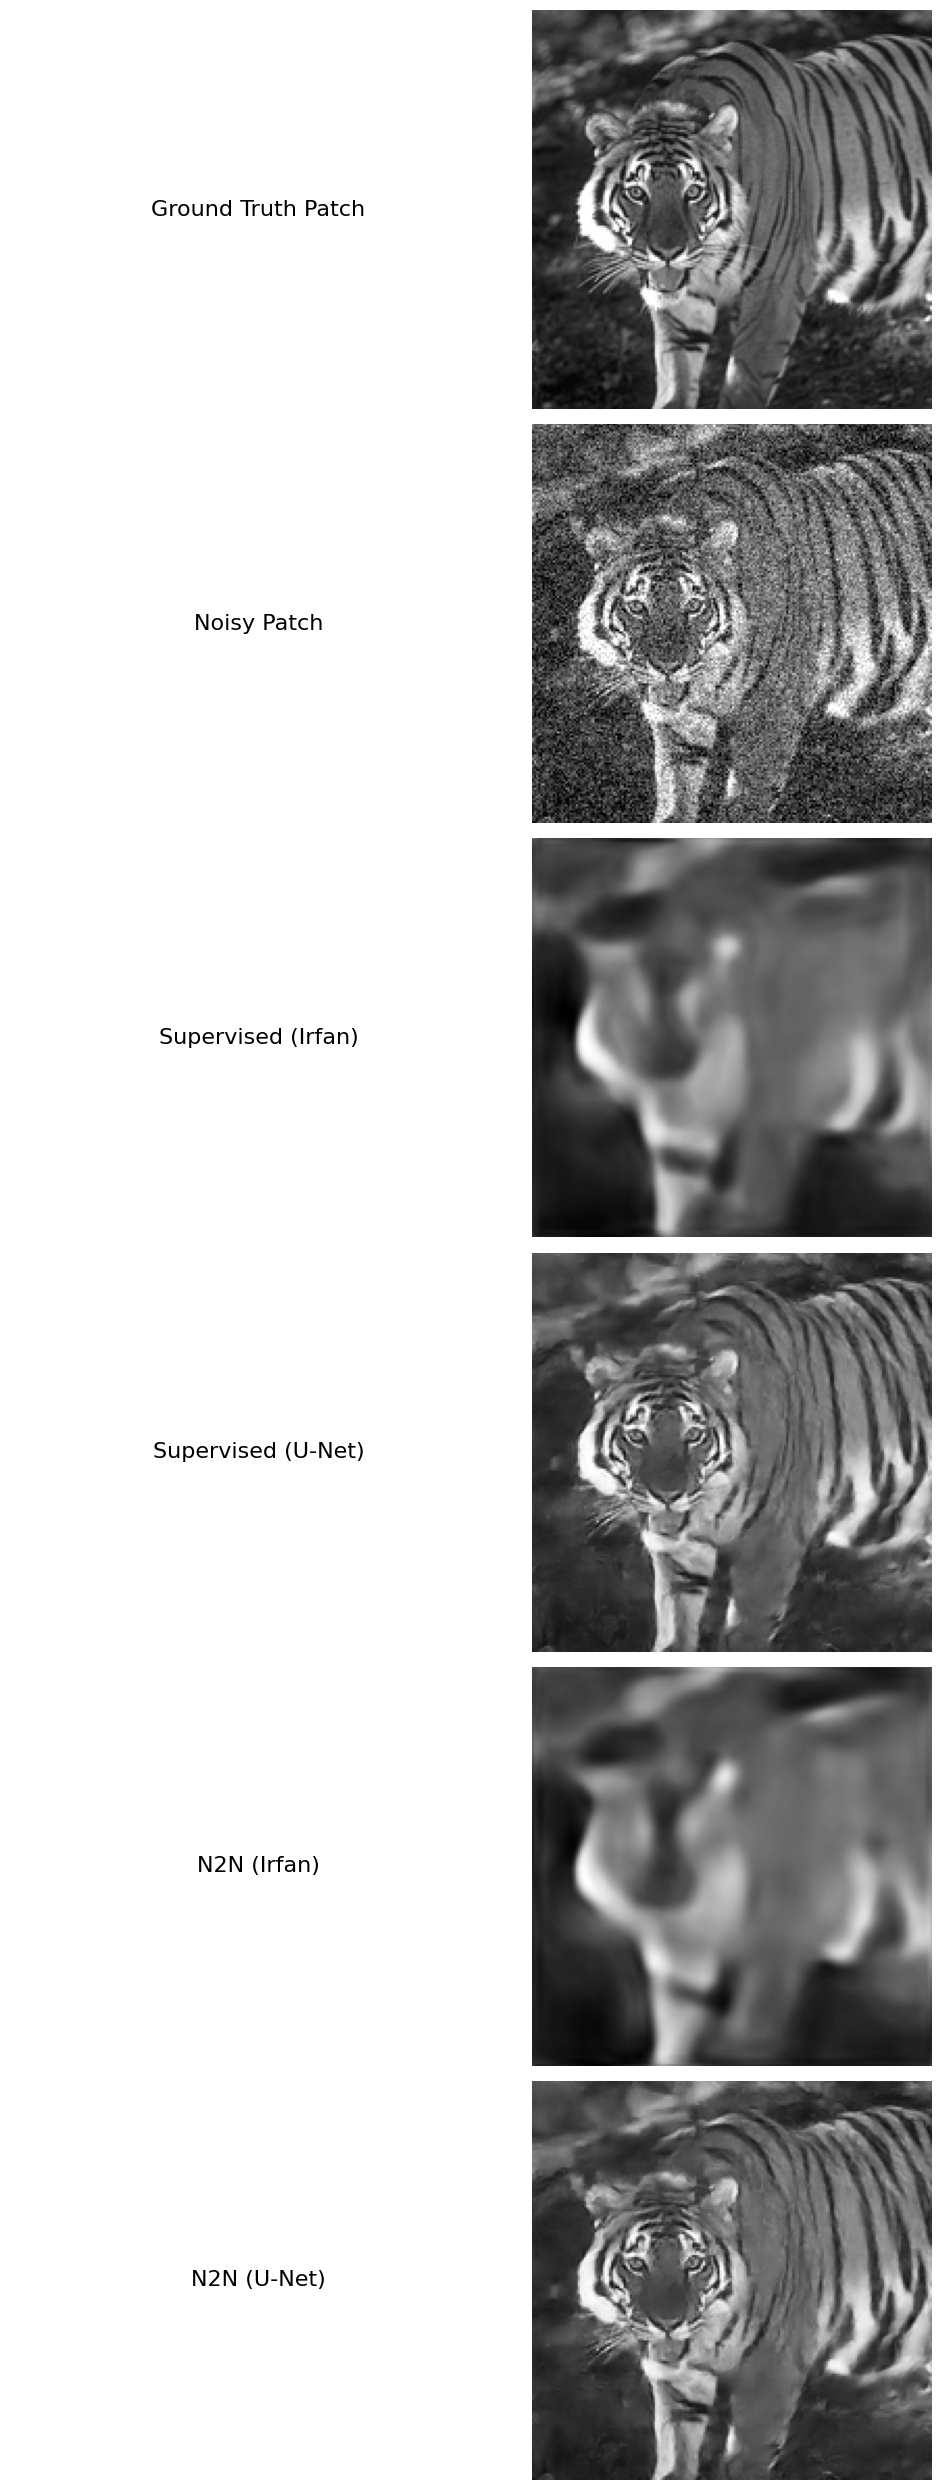

In [10]:
reload(utils)

models = [sup_irfan, sup_unet, n2n_irfan, n2n_unet]
titles = ["Supervised (Irfan)", "Supervised (U-Net)", "N2N (Irfan)", "N2N (U-Net)"]
utils.compare_models_on_image(image_path=TEST_IMAGE_1_PATH, models=models, 
                              patch_coords=TEST_IMAGE_1_COORDS, patch_size=192, 
                              stddev=STDDEV, titles=titles)

## Comparing multiple models on multiple images

1/1 [==============================] - 0s 47ms/step


/var/folders/6d/6rll4yfx64n5s_34fjy87zd80000gn/T/ipykernel_40216/1900514889.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


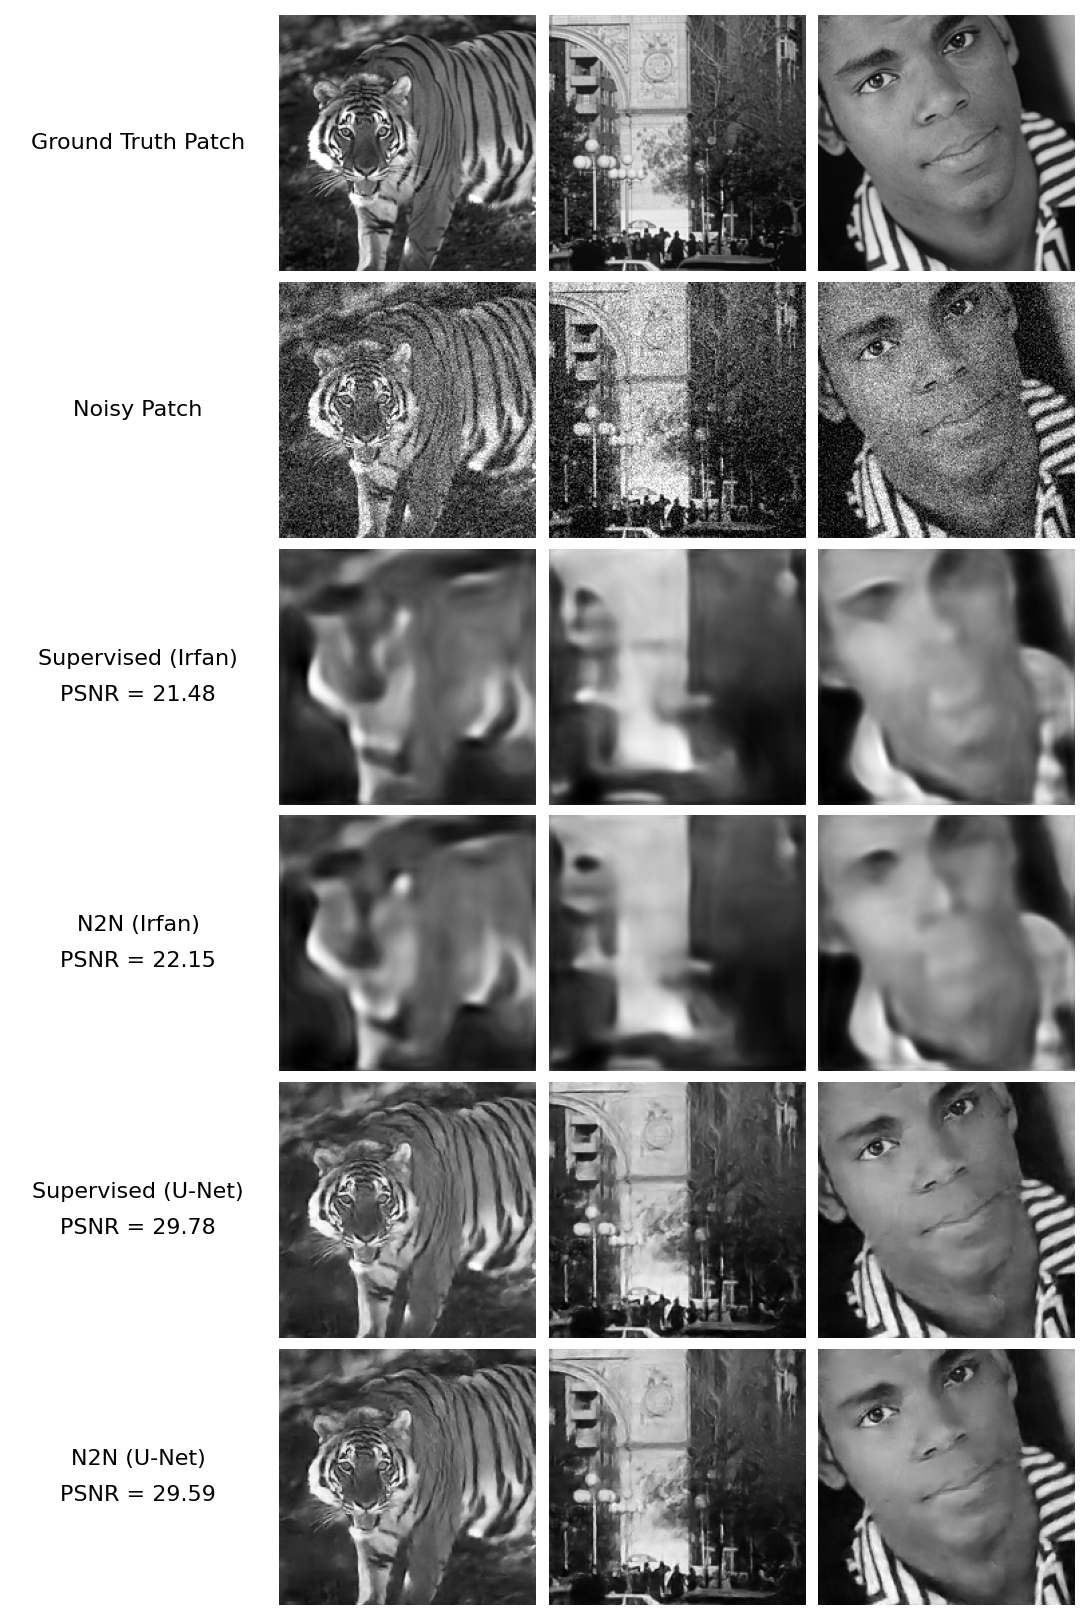

In [11]:

reload(utils)
image_paths = [TEST_IMAGE_1_PATH, TEST_IMAGE_2_PATH, TEST_IMAGE_3_PATH]
patch_coords = [TEST_IMAGE_1_COORDS, TEST_IMAGE_2_COORDS, TEST_IMAGE_3_COORDS]
models = [sup_irfan, n2n_irfan, sup_unet, n2n_unet]
titles = ["Supervised (Irfan)\nPSNR = 21.48", "N2N (Irfan)\nPSNR = 22.15", "Supervised (U-Net)\nPSNR = 29.78", "N2N (U-Net)\nPSNR = 29.59"]

fig = utils.compare_models_on_multiple_images(
    image_paths, 
    models, 
    patch_coords=patch_coords, 
    patch_size=192, 
    stddev=STDDEV, 
    titles=titles
)

fig.savefig("denoising_comparison_1.pdf")
fig.show()

1/1 [==============================] - 0s 52ms/step


/var/folders/6d/6rll4yfx64n5s_34fjy87zd80000gn/T/ipykernel_40216/896683775.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


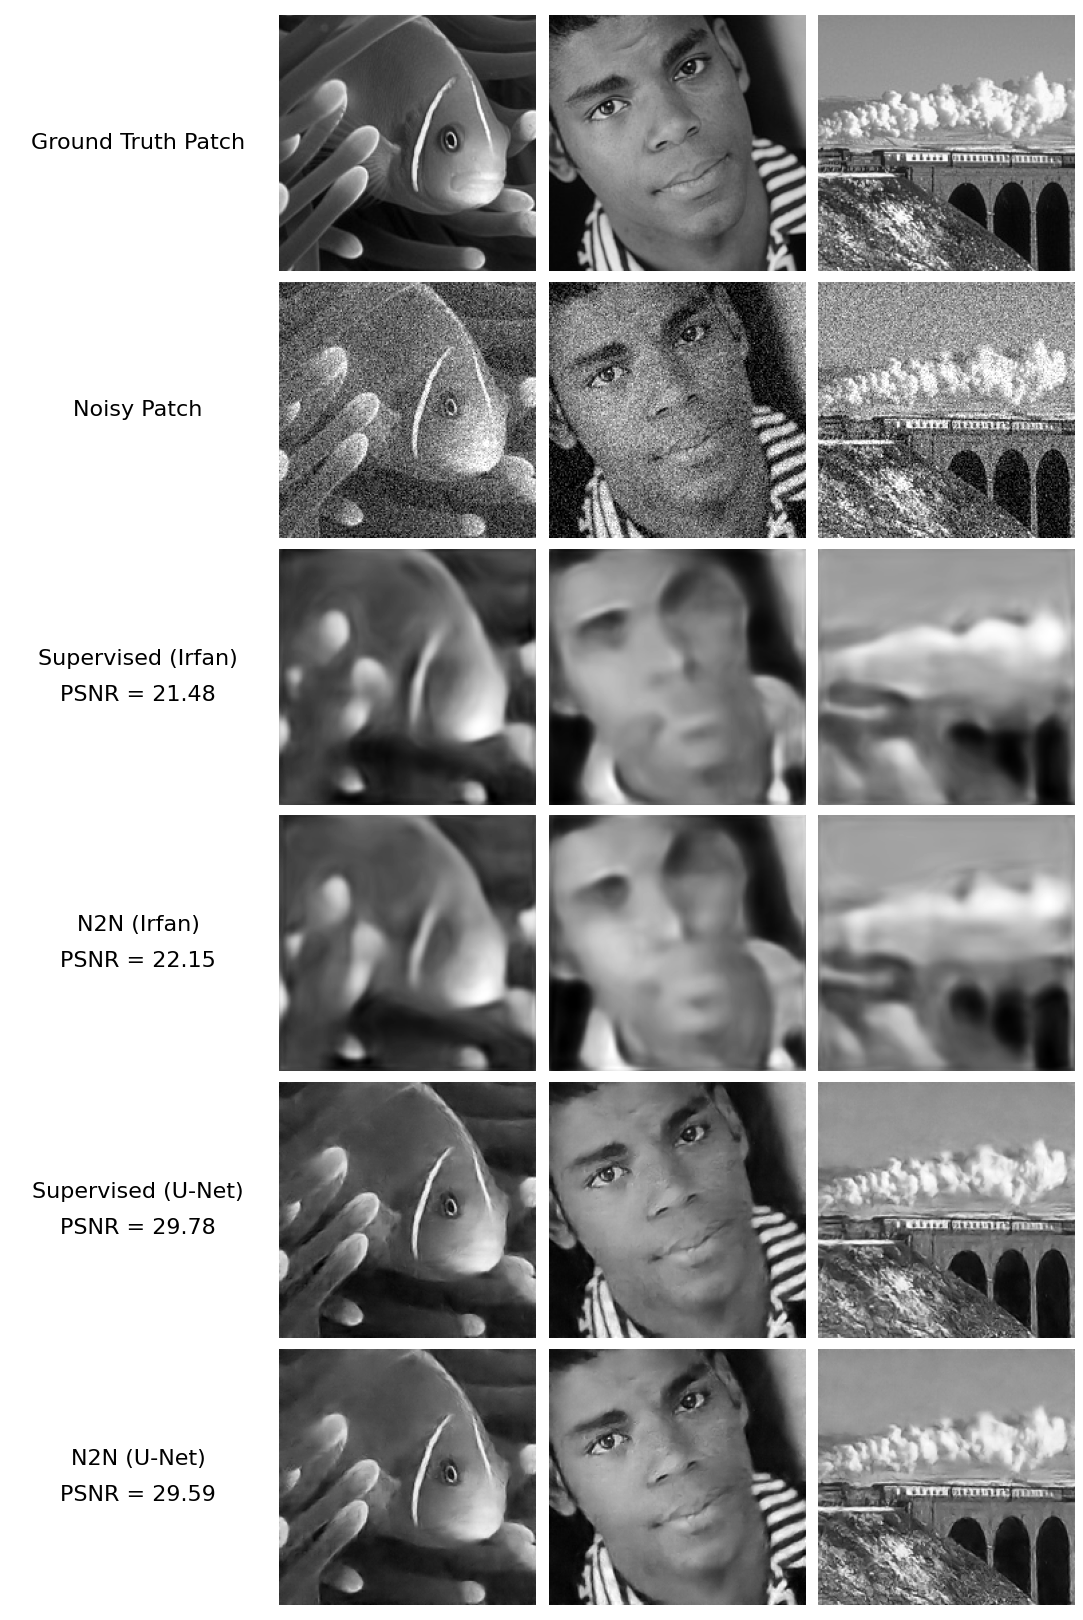

In [38]:
reload(utils)
TEST_IMAGE_1_PATH = TEST_IMAGE_DIR + "/210088.jpg"
TEST_IMAGE_2_PATH = TEST_IMAGE_DIR + "/302008.jpg"
TEST_IMAGE_3_PATH = TEST_IMAGE_DIR + "/182053.jpg"

TEST_IMAGE_1_COORDS = (50, 150)
TEST_IMAGE_2_COORDS = (80, 110)
TEST_IMAGE_3_COORDS = (80, 70)

image_paths = [TEST_IMAGE_1_PATH, TEST_IMAGE_2_PATH, TEST_IMAGE_3_PATH]
patch_coords = [TEST_IMAGE_1_COORDS, TEST_IMAGE_2_COORDS, TEST_IMAGE_3_COORDS]
models = [sup_irfan, n2n_irfan, sup_unet, n2n_unet]
titles = ["Supervised (Irfan)\nPSNR = 21.48", "N2N (Irfan)\nPSNR = 22.15", "Supervised (U-Net)\nPSNR = 29.78", "N2N (U-Net)\nPSNR = 29.59"]

fig = utils.compare_models_on_multiple_images(
    image_paths, 
    models, 
    patch_coords=patch_coords, 
    patch_size=192, 
    stddev=STDDEV, 
    titles=titles
)

fig.savefig("denoising_comparison_2.pdf")
fig.show()